In [22]:
import math
import numpy
from scipy import integrate
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

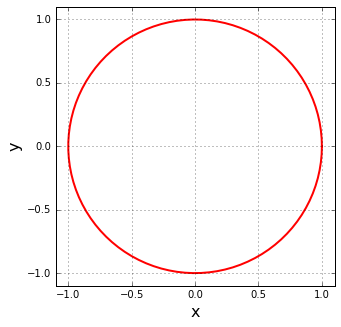

In [5]:
uinf = 1          # classic

R = 1
theta = numpy.linspace(0,2*numpy.pi,100)
xcylinder, ycylinder = R*numpy.cos(theta), R*numpy.sin(theta)

# plot to make sure it isn't broken
size = 5
pyplot.figure(figsize=(size, size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(xcylinder, ycylinder, color='r', linestyle='-', linewidth=2)
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

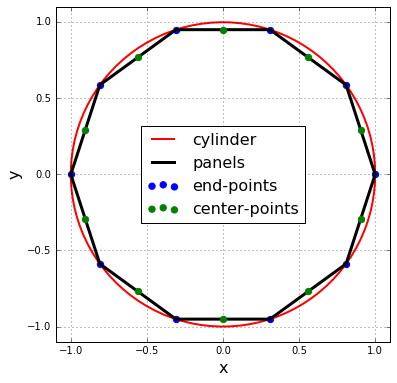

In [15]:
num_panels = 10
xends = R*numpy.cos(numpy.linspace(0, 2*math.pi, num_panels+1))
yends = R*numpy.sin(numpy.linspace(0, 2*math.pi, num_panels+1))

panels = numpy.empty(num_panels, dtype=object)
for i in range(num_panels):
    panels[i] = Panel(xends[i], yends[i], xends[i+1], yends[i+1])
    
# plot the panels
size = 6
pyplot.figure(figsize=(size, size))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(xcylinder, ycylinder,
            label='cylinder',
            color='r', linestyle='-', linewidth=2)
pyplot.plot(xends, yends,
            label='panels',
            color='k', linestyle='-', linewidth=3)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels],
               label='end-points',
               color='b', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels],
               label='center-points',
               color='g', s=40, zorder=3)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.1, 1.1)
pyplot.ylim(-1.1, 1.1);

In [20]:
A = numpy.empty((num_panels, num_panels), dtype=float)
numpy.fill_diagonal(A,0.5)   # like identity matrix * panel contributionratio

for i, p_i in enumerate(panels):
    for j, p_j in enumerate(panels):
        if i != j:
            A[i,j] = 0.5/math.pi*integral_normal(p_i,p_j)

b = -uinf * numpy.cos([p.beta for p in panels])

sigma = numpy.linalg.solve(A,b)
for i, panel in enumerate(panels):
    panel.sigma = sigma[i]       # each source panel now has an appropriate strength

In [24]:
A = numpy.empty((num_panels, num_panels), dtype=float)
numpy.fill_diagonal(A,0.0)   # 0 instead of 0.5

for i, p_i in enumerate(panels):
    for j, p_j in enumerate(panels):
        if i != j:
            A[i,j] = 0.5/math.pi*integral_tangential(p_i,p_j)

b = -uinf * numpy.sin([p.beta for p in panels])    # normal-->tangential, cos-->sin

vt = numpy.dot(A,sigma) + b
for i, panel in enumerate(panels):
    panel.vt = vt[i]       # each source panel now has an appropriate tangential velocity
    
# can now calculate the surface pressure coefficient
for panel in panels:
    panel.cp = 1.0 - (panel.vt/uinf)**2

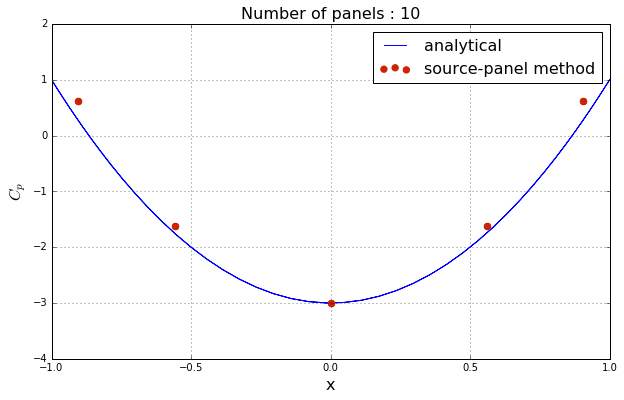

In [26]:
# calculate the analytical surface pressure coefficient
cp_analytical = 1.0 - 4*(ycylinder/R)**2

# plot the surface pressure coefficient
pyplot.figure(figsize=(10, 6))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
pyplot.plot(xcylinder, cp_analytical,
            label='analytical',
            color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in panels], [p.cp for p in panels],
               label='source-panel method',
               color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % num_panels, fontsize=16)
pyplot.legend(loc='best', prop={'size':16})
pyplot.xlim(-1.0, 1.0)
pyplot.ylim(-4.0, 2.0);

### Challenge Question

Your task is to:
* derive the Cartesian velocity components
* create a mesh grid
* compute the velocity field on the mesh grid
* plot the results
* change the number of panels to improve the visualization


# Return to this later